In [1]:
import sys,os
[sys.path.append(x[0]) for x in os.walk('tools')]
import dictionariesSL2P
import SL2P
from matplotlib import pyplot as plt
import os,numpy
import rasterio
import os
import pandas as pd

### Initiation

In [2]:
variableName='LAI'
# variableName='fAPAR'
# variableName='fCOVER'
# imageCollectionName="COPERNICUS/S2_SR_HARMONIZED"
# imageCollectionName="NASA/HLS/HLSL30/v002"
imageCollectionName="S2_L2A"
# fn='E:/vegetation/gee/notebook/CFS/sitesS2SR_1k_2021_apr_nov.csv'
# fn='E:/vegetation/gee/notebook/CFS/HW_SW/sitesHLSSR_FO_2007_2014_mixed_2019_apr_nov_fraction50_cloud.csv'
# fn='E:/vegetation/gee/notebook/CFS/HW_SW/sitesS2SR_FO_2007_2014_mixed_2023_apr_nov_fraction50_cloud.csv'
# fn='E:/vegetation/gee/notebook/CFS/HW_SW/sitesS2SR_FO_2007_2018_SW_2020_apr_nov_fraction50_cloud.csv' 
# fn='E:/vegetation/gee/notebook/CFS/HW_SW/sitesS2SR_FO_2007_2018_SW_2019_apr_nov_fraction50_cloud.csv'
# fn='E:/vegetation/gee/notebook/CFS/HW_SW/sitesS2SR_FO_2007_2018_HW_2023_apr_nov_fraction50_cloud.csv'
# fn='E:/vegetation/gee/notebook/CFS/HW_SW/S2/SR/sitesS2SR_FO_2015_2018_mixed_2022_apr_nov_fraction50_cloud.csv' 
# fn='E:/vegetation/gee/notebook/CFS/Ref/sitesS2SR_MW_2023_apr_nov_fraction99_by3.csv'

years=list(range(2019, 2025))
category=['HW', 'MW', 'SW']

for i in years:
    for j in category:
        
        fn='E:/vegetation/gee/notebook/CFS/Ref/sitesS2SR_'+j+'_'+str(i)+'_apr_nov_fraction99.csv'
        #### Input data Control ***-
        if variableName not in dictionariesSL2P.make_net_options().keys():
            raise ValueError(('Supported vegetation valiables: %s'%(dictionariesSL2P.make_net_options().keys())))
        if imageCollectionName not in dictionariesSL2P.make_net_options()[variableName].keys():
            raise ValueError(('Supported EO datasets: %s'%(dictionariesSL2P.make_net_options()[variableName].keys())))  

        sl2p_inputs_bands=dictionariesSL2P.make_net_options()[variableName][imageCollectionName]['inputBands']  
        print ('SL2P input data format for %s data: %s' %(imageCollectionName,sl2p_inputs_bands))

        data=pd.read_csv(fn)

        data.rename(columns={'B1': 'B01', 'B2': 'B02', 'B3': 'B03', 'B4': 'B04', 'B5': 'B05', 'B6': 'B06', 'B7': 'B07', 'B8': 'B08', 'B9': 'B09'}, inplace=True)

        # rename column names
        data = data.rename(columns={'date': 'time', 'utc': 'Date'})

        # calculate NDVI =(NIR-R)/(NIR+R)
        data['NDVI']=(data['B08']-data['B04'])/(data['B08']+data['B04']) 

        DF=SL2P.SL2P(data,variableName,imageCollectionName,sl2p_inputs_bands)

        sr_list=['B01', 'B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B8A', 'B09', 'B11', 'B12', 'longitude', 'latitude', 'partition','TARGET_FID','Date', 'NDVI', 's2cloudless_probability']
        para_list=['estimateLAI', 'errorLAI', 'QC_input', 'QC_output']
        # para_list=['estimatefAPAR', 'errorfAPAR', 'QC_input', 'QC_output']
        # para_list=['estimatefCOVER', 'errorfCOVER', 'QC_input', 'QC_output']

        #Export DF
        data[sr_list].join(DF[para_list]).to_csv(fn.replace('.csv','_%s_SL2P2.csv'%(variableName)))

SL2P input data format for S2_L2A data: ['cosVZA', 'cosSZA', 'cosRAA', 'B03', 'B04', 'B05', 'B06', 'B07', 'B8A', 'B11', 'B12']
Estimating LAI from S2_L2A data using SL2P-V0 [Marie Weiss]
Run SL2P...
SL2P start: 2025-01-12 00:19:16.040072
SL2P end: 2025-01-12 00:19:16.246384
Generating sl2p input data flag
Generating sl2p output product flag
Done
SL2P input data format for S2_L2A data: ['cosVZA', 'cosSZA', 'cosRAA', 'B03', 'B04', 'B05', 'B06', 'B07', 'B8A', 'B11', 'B12']
Estimating LAI from S2_L2A data using SL2P-V0 [Marie Weiss]
Run SL2P...
SL2P start: 2025-01-12 00:19:24.246696
SL2P end: 2025-01-12 00:19:24.448300
Generating sl2p input data flag
Generating sl2p output product flag
Done
SL2P input data format for S2_L2A data: ['cosVZA', 'cosSZA', 'cosRAA', 'B03', 'B04', 'B05', 'B06', 'B07', 'B8A', 'B11', 'B12']
Estimating LAI from S2_L2A data using SL2P-V0 [Marie Weiss]
Run SL2P...
SL2P start: 2025-01-12 00:19:32.123362
SL2P end: 2025-01-12 00:19:32.307791
Generating sl2p input data fl

### 1- Read / prepare data

In [3]:
data=pd.read_csv(fn)
data.tail(3)
# print('done')

,Unnamed: 0,B1,B2,B3,B4,B5,B6,B7,B8,B8A,...,cosVZA,cosSZA,cosRAA,partition,s2cloudless_probability,TARGET_FID,MSK_CLASSI_OPAQUE,MSK_CLASSI_CIRRUS,MSK_CLASSI_SNOW_ICE,utc
176970,176970,0.1024,0.0908,0.0958,0.0944,0.1139,0.1802,0.1976,0.2269,0.2172,...,0.9968,0.3688,0.0225,6,14.75,6,NaN,NaN,NaN,2023-11-28 16:40:30.128
176971,176971,0.1187,0.1759,0.1622,0.1504,0.1774,0.2398,0.2499,0.2645,0.2620,...,0.9968,0.3688,0.0225,6,14.50,6,NaN,NaN,NaN,2023-11-28 16:40:30.128
176972,176972,0.1187,0.1759,0.1622,0.1504,0.1774,0.2398,0.2499,0.2645,0.2620,...,0.9968,0.3688,0.0225,6,13.25,6,NaN,NaN,NaN,2023-11-28 16:40:30.128


In [4]:
# list(data.columns.values)

In [5]:
data.rename(columns={'B1': 'B01', 'B2': 'B02', 'B3': 'B03', 'B4': 'B04', 'B5': 'B05', 'B6': 'B06', 'B7': 'B07', 'B8': 'B08', 'B9': 'B09'}, inplace=True)

In [6]:
# rename column names
data = data.rename(columns={'date': 'time', 'utc': 'Date'})

In [7]:
data[sl2p_inputs_bands].tail(3)

,cosVZA,cosSZA,cosRAA,B03,B04,B05,B06,B07,B8A,B11,B12
176970,0.9968,0.3688,0.0225,0.0958,0.0944,0.1139,0.1802,0.1976,0.2172,0.0404,0.0340
176971,0.9968,0.3688,0.0225,0.1622,0.1504,0.1774,0.2398,0.2499,0.2620,0.0368,0.0333
176972,0.9968,0.3688,0.0225,0.1622,0.1504,0.1774,0.2398,0.2499,0.2620,0.0368,0.0333


In [8]:
# data[sl2p_inputs_bands]=data[sl2p_inputs_bands]/10000

In [9]:
# data[sl2p_inputs_bands].tail(3)

In [10]:
# divide 10000 for other bands.
# data[['B01', 'B02', 'B08','B09']] =data[['B01', 'B02', 'B08','B09']].div(10000)

In [11]:
# calculate NDVI =(NIR-R)/(NIR+R)
data['NDVI']=(data['B08']-data['B04'])/(data['B08']+data['B04']) 

In [12]:
# data.head(3)

In [13]:
# list(data.columns.values)

### 2 - Run SL2PV0 / export outputs

In [14]:
DF=SL2P.SL2P(data,variableName,imageCollectionName,sl2p_inputs_bands)
DF.tail(3)

Estimating LAI from S2_L2A data using SL2P-V0 [Marie Weiss]
Run SL2P...
SL2P start: 2024-12-17 11:38:44.315697
SL2P end: 2024-12-17 11:38:44.590258
Generating sl2p input data flag
Generating sl2p output product flag
Done


,estimateLAI,networkID,errorLAI,QC_input,QC_output
176970,2.156188,0,0.666717,1,0
176971,2.120662,0,0.493797,1,0
176972,2.120662,0,0.493797,1,0


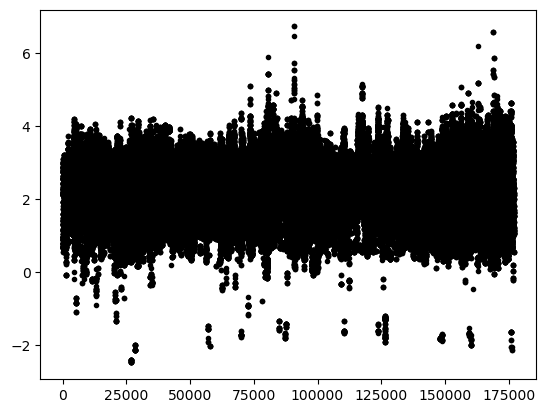

In [15]:
plt.plot(DF['estimateLAI'],'.k')
# plt.plot(DF['estimatefAPAR'],'.k')
# plt.plot(DF['estimatefCOVER'],'.k')

In [18]:
sr_list=['B01', 'B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B8A', 'B09', 'B11', 'B12', 'longitude', 'latitude', 'TARGET_FID','Date', 'NDVI', 's2cloudless_probability']
para_list=['estimateLAI', 'errorLAI', 'QC_input', 'QC_output']
# para_list=['estimatefAPAR', 'errorfAPAR', 'QC_input', 'QC_output']
# para_list=['estimatefCOVER', 'errorfCOVER', 'QC_input', 'QC_output']

In [19]:
#Export DF
# data[['date', 'longitude', 'latitude']].join(DF).to_csv(fn.replace('.csv','_%s_SL2P.csv'%(variableName))) 
data[sr_list].join(DF[para_list]).to_csv(fn.replace('.csv','_%s_SL2P2.csv'%(variableName))) 

### 3 - Run SL2P-CCRS / export outputs

In [ ]:
DF=SL2P.SL2PCCRS(data,variableName,imageCollectionName,sl2p_inputs_bands)
DF

In [ ]:
#Export DF
data[['date', 'longitude', 'latitude']].join(DF).to_csv(fn.replace('.csv','_%s_SL2PCCRS.csv'%(variableName))) 

In [ ]:
fn.replace('.csv','_%s_SL2PND.csv'%(variableName))